In [79]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [41]:
sat_df = pd.read_csv('SAT2017.csv')
gdp_df = pd.read_csv('gdp.csv')
df = sat_df.merge(gdp_df, left_on = 'State', right_on='GeoName', how='inner')

In [44]:
df1 = df[['State','Total','2017']].rename(columns = {'2017':'GDP_Per_Capita', 'Total':'SAT_Score'})

In [153]:
df1

,State,SAT_Score,GDP_Per_Capita
0,Alabama,1166,39523
1,Alaska,1106,70683
2,Arizona,1149,42353
3,Arkansas,1169,37930
4,California,1076,65160
5,Colorado,1025,57654
6,Connecticut,1053,66592
7,Delaware,998,66419
8,District of Columbia,977,176127
9,Florida,1014,42085


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

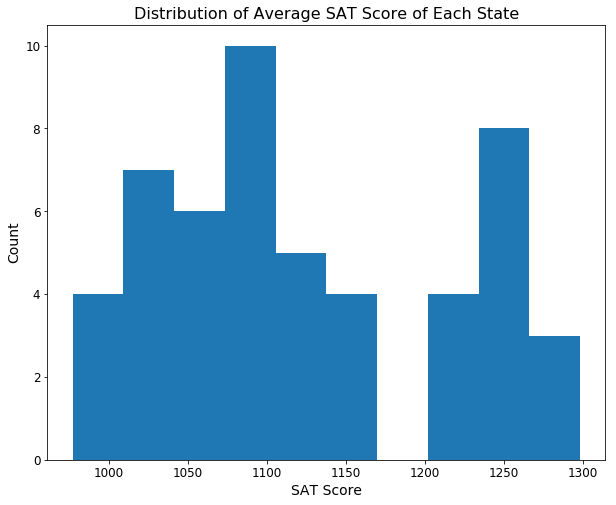

In [58]:
plt.figure(figsize=(10,8))
plt.hist(df1['SAT_Score'])
plt.title('Distribution of Average SAT Score of Each State', fontsize = 16)
plt.xlabel('SAT Score', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text yticklabel objects>)

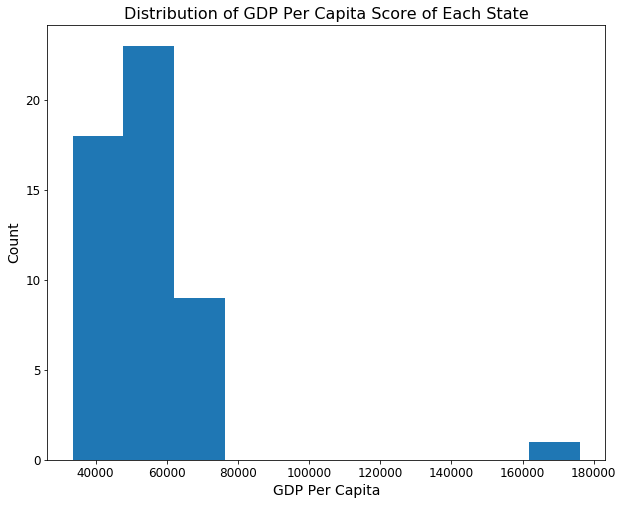

In [167]:
plt.figure(figsize=(10,8))
plt.hist(df1['GDP_Per_Capita'])
plt.title('Distribution of GDP Per Capita Score of Each State', fontsize = 16)
plt.xlabel('GDP Per Capita', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.]),
 <a list of 9 Text yticklabel objects>)

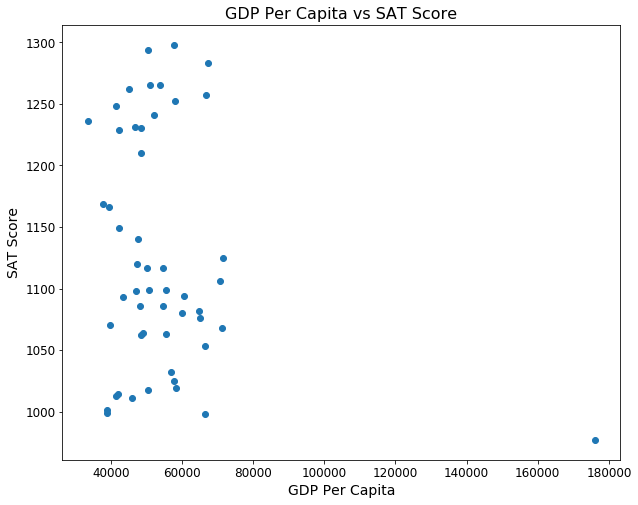

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(df1['GDP_Per_Capita'], df1['SAT_Score'])
plt.title('GDP Per Capita vs SAT Score', fontsize = 16)
plt.xlabel('GDP Per Capita', fontsize = 14)
plt.ylabel('SAT Score', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [62]:
df2 = df1[df1.State != 'District of Columbia']

(array([ 950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.]),
 <a list of 9 Text yticklabel objects>)

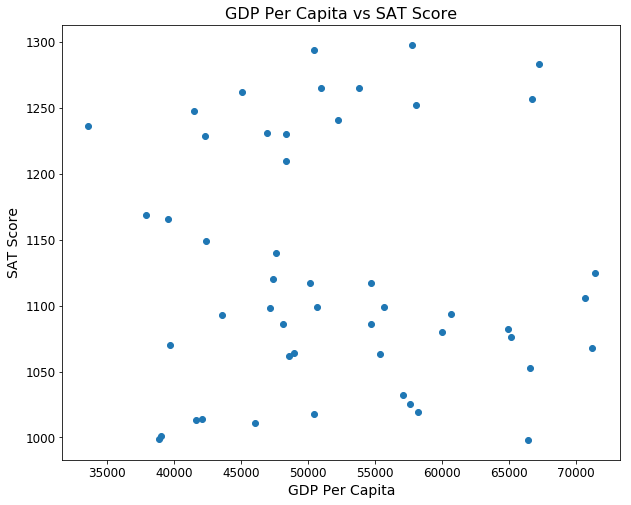

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(df2['GDP_Per_Capita'], df2['SAT_Score'])
plt.title('GDP Per Capita vs SAT Score', fontsize = 16)
plt.xlabel('GDP Per Capita', fontsize = 14)
plt.ylabel('SAT Score', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [64]:
#Normalize
def orthonormalize(df):
    for column in df:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df
df3 = orthonormalize(df2[['GDP_Per_Capita', 'SAT_Score']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [107]:
model1 = smf.ols(formula="SAT_Score ~ GDP_Per_Capita", data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SAT_Score   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.476
Date:                Thu, 28 Feb 2019   Prob (F-statistic):              0.122
Time:                        18:37:15   Log-Likelihood:                -302.55
No. Observations:                  51   AIC:                             609.1
Df Residuals:                      49   BIC:                             613.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1182.0994     38.380     30.800      0.000    1104.972    1259.227
GDP_Per_Capita    -0.0010      0.001     -1.574      0.122      -0.002       0.000
==============================================================================
Omnibus:                        6.497   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.298
Skew:                           0.385   Prob(JB):                        0.192
Kurtosis:                       2.021   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
mean_squared_error(df1['SAT_Score'], model1.fittedvalues)

8323.809042891831

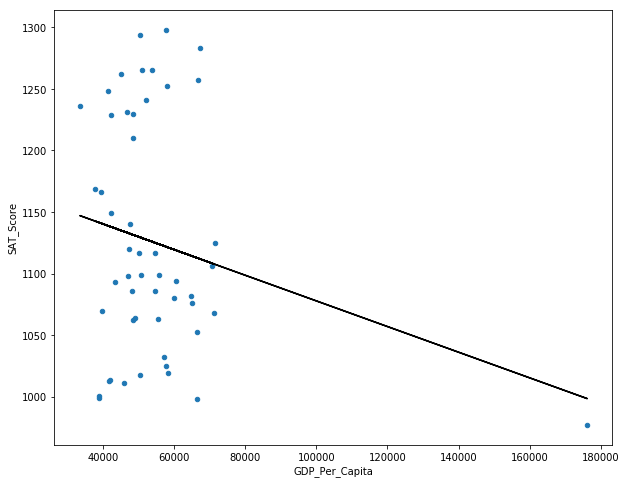

In [73]:
ax = plt.figure(figsize=(10,8)).add_subplot(111)
df1.plot(kind = 'Scatter', y = 'SAT_Score', x = 'GDP_Per_Capita', ax = ax)
ax.plot(df1['GDP_Per_Capita'], model1.fittedvalues, '-', color = 'black')

(array([ 980., 1000., 1020., 1040., 1060., 1080., 1100., 1120., 1140.,
        1160.]), <a list of 10 Text yticklabel objects>)

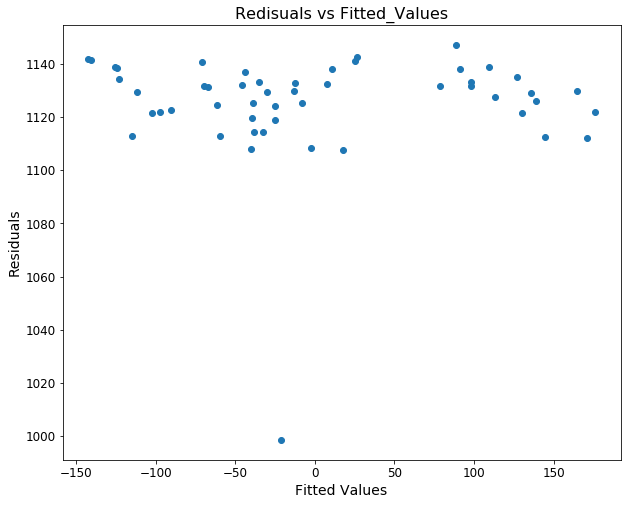

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(model1.resid, model1.fittedvalues)
plt.title('Redisuals vs Fitted_Values', fontsize = 16)
plt.xlabel('Fitted Values', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

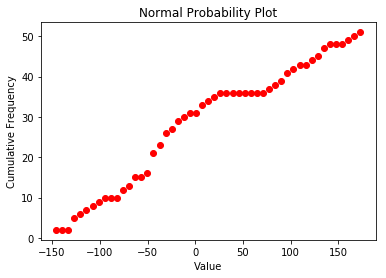

In [109]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# 100 values from a normal distribution with a std of 3 and a mean of 0.5
counts, start, dx, _ = scipy.stats.cumfreq(model1.resid, numbins = len(model1.resid))
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Normal Probability Plot')
plt.show()

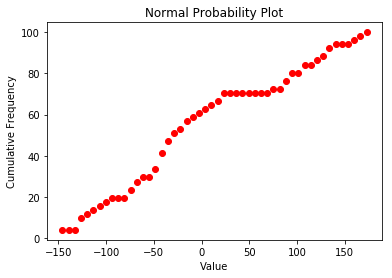

In [105]:
counts, start, dx, _ = scipy.stats.cumfreq(model1.resid, numbins = len(model2.resid))
x = np.arange(counts.size) * dx + start

plt.plot(x, counts*100/len(model1.resid), 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Normal Probability Plot')
plt.show()

In [106]:
model1

In [95]:
counts

array([ 2.,  5.,  8., 10., 12., 15., 22., 27., 31., 33., 36., 36., 36.,
       37., 41., 43., 45., 48., 49., 51.])

In [97]:
len(model1.resid)

51

In [77]:
model2 = smf.ols(formula="SAT_Score ~ GDP_Per_Capita", data = df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SAT_Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1167
Date:                Thu, 28 Feb 2019   Prob (F-statistic):              0.734
Time:                        15:40:37   Log-Likelihood:                -297.00
No. Observations:                  50   AIC:                             598.0
Df Residuals:                      48   BIC:                             601.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1152.6934     72.739     15.847      0.000    1006.443    1298.944
GDP_Per_Capita    -0.0005      0.001     -0.342      0.734      -0.003       0.002
==============================================================================
Omnibus:                        9.655   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.754
Skew:                           0.378   Prob(JB):                        0.153
Kurtosis:                       1.890   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
mean_squared_error(df2['SAT_Score'], model2.fittedvalues)

8450.164915831556

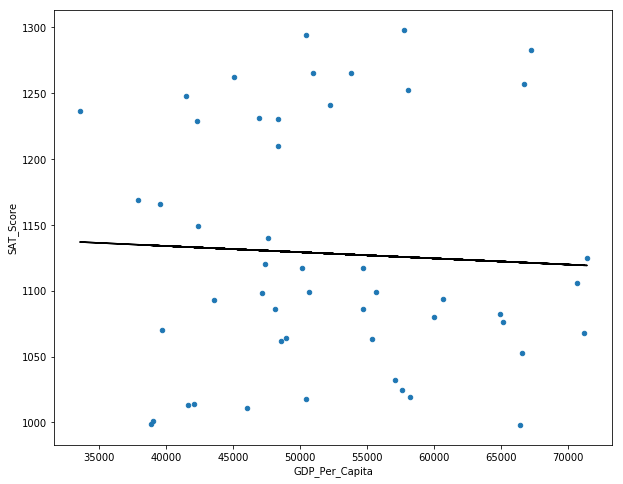

In [78]:
ax = plt.figure(figsize=(10,8)).add_subplot(111)
df2.plot(kind = 'Scatter', y = 'SAT_Score', x = 'GDP_Per_Capita', ax = ax)
ax.plot(df2['GDP_Per_Capita'], model2.fittedvalues, '-', color = 'black')

(array([1117.5, 1120. , 1122.5, 1125. , 1127.5, 1130. , 1132.5, 1135. ,
        1137.5, 1140. ]), <a list of 10 Text yticklabel objects>)

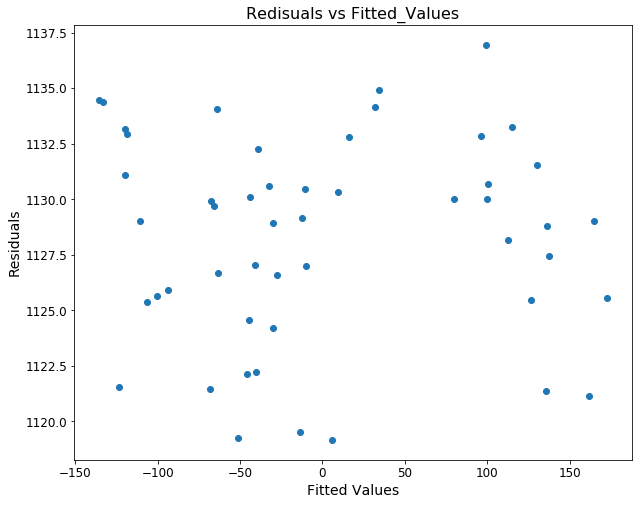

In [83]:
plt.figure(figsize=(10,8))
plt.scatter(model2.resid, model2.fittedvalues)
plt.title('Redisuals vs Fitted_Values', fontsize = 16)
plt.xlabel('Fitted Values', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [70]:
model3 = smf.ols(formula="SAT_Score ~ GDP_Per_Capita", data = df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SAT_Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1167
Date:                Thu, 28 Feb 2019   Prob (F-statistic):              0.734
Time:                        15:10:18   Log-Likelihood:                -70.381
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.674e-17      0.143   6.08e-16      1.000      -0.287       0.287
GDP_Per_Capita    -0.0493      0.144     -0.342      0.734      -0.339       0.241
==============================================================================
Omnibus:                        9.655   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                3.754
Skew:                           0.378   Prob(JB):                        0.153
Kurtosis:                       1.890   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

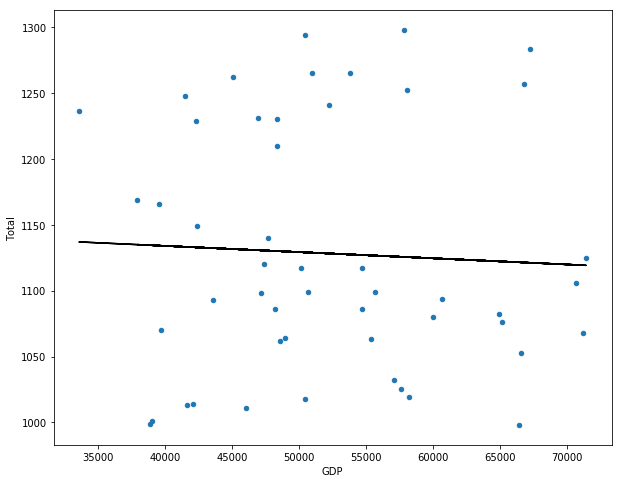

In [39]:
ax = plt.figure(figsize=(10,8)).add_subplot(111)
df2.plot(kind = 'Scatter', y = 'Total', x = 'GDP', ax = ax)
ax.plot(df2['GDP'], model1.fittedvalues, '-', color = 'black')

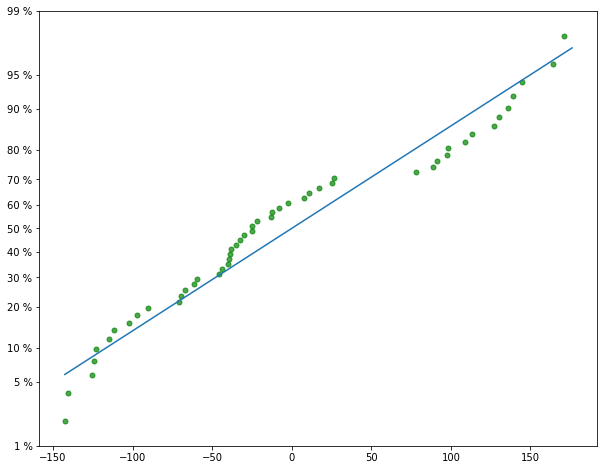

In [165]:
import numpy as np
import scipy.stats as stats
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, Locator


class PPFScale(mscale.ScaleBase):
    name = 'ppf'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self)

    def get_transform(self):
        return self.PPFTransform()

    def set_default_locators_and_formatters(self, axis):
        class PercFormatter(Formatter):
            def __call__(self, x, pos=None):
                # \u00b0 : degree symbol
                return "%d %%" % (x*100)

        class PPFLocator(Locator):
            def __call__(self):
                return np.array([1,5,10,20,30,40,50,60,70,80,90,95,99])/100.0

        axis.set_major_locator(PPFLocator())
        axis.set_major_formatter(PercFormatter())
        axis.set_minor_formatter(PercFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return max(vmin, 1e-6), min(vmax, 1-1e-6)

    class PPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def ___init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            out = stats.norm.ppf(a)
            return out


        def inverted(self):
            return PPFScale.IPPFTransform()

    class IPPFTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a):

            return stats.norm.cdf(a)

        def inverted(self):
            return PPFScale.PPFTransform()

mscale.register_scale(PPFScale)


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    from statsmodels.distributions.empirical_distribution import ECDF
    
    cumprob = ECDF(model1.resid)(model1.resid)
    loc, scale = stats.norm.fit(model1.resid)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(model1.resid.min(),model1.resid.max())
    ax = plt.figure(figsize=(10,8)).add_subplot(111)
    ax.plot(model1.resid,cumprob, 'go', alpha=0.7, markersize=5)
    ax.plot(x,pffit.cdf(x),'-')
    ax.set_yscale('ppf')
    ax.set_ylim(0.01,0.99)
    plt.show()

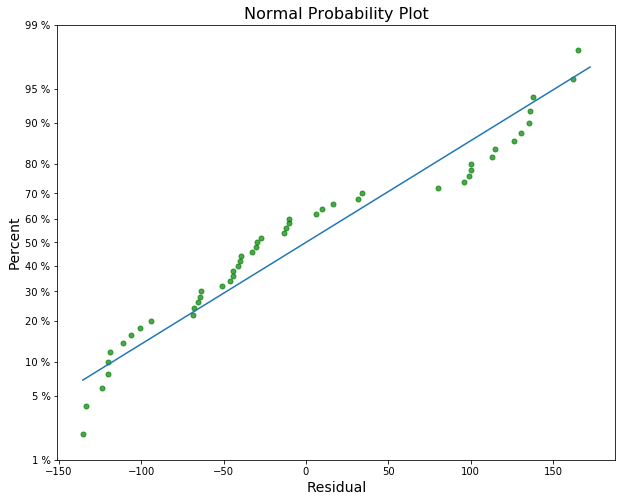

In [236]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    from statsmodels.distributions.empirical_distribution import ECDF
    
    cumprob = ECDF(model2.resid)(model2.resid)
    loc, scale = stats.norm.fit(model2.resid)
    pffit = stats.norm(loc=loc,scale=scale)

    x = np.linspace(model2.resid.min(),model2.resid.max())
    ax = plt.figure(figsize=(10,8)).add_subplot(111)
    
    ax.plot(model2.resid,cumprob, 'go', alpha=0.7, markersize=5)
    ax.plot(x,pffit.cdf(x),'-')
    ax.set_yscale('ppf')
    ax.set_ylim(0.01,0.99)
    ax.set_title('Normal Probability Plot', fontsize =16)
    ax.set_xlabel('Residual', fontsize = 14)
    ax.set_ylabel('Percent', fontsize = 14)
    plt.show()

In [226]:
data_intervals = {'GDP': df2['GDP_Per_Capita'], 'predict_low': predict_ci_low, 
                  'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 
                  'conf_high': predict_mean_ci_upp}

df_intervals = pd.DataFrame(data=data_intervals)

df_intervals_sort = df_intervals.sort_values(by='GDP')

Text(0.5, 1.0, 'GDP Per Capital vs SAT Score with Fitted Line, Confidence Interval, and Prediction Interval')

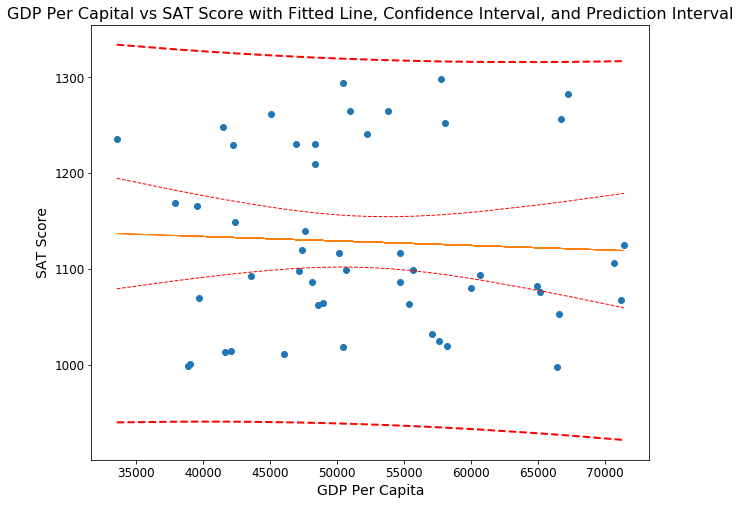

In [233]:
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

st, data, ss2 = summary_table(model2, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T



x = np.linspace(df2['GDP_Per_Capita'].min(),df2['GDP_Per_Capita'].max())
plt.plot(df2['GDP_Per_Capita'], df2['SAT_Score'], 'o')
plt.plot(df2['GDP_Per_Capita'], fittedvalues, '-', lw=1)
plt.plot(df_intervals_sort['GDP'], df_intervals_sort['predict_low'], 'r--', lw=2)
plt.plot(df_intervals_sort['GDP'], df_intervals_sort['predict_upp'], 'r--', lw=2)
plt.plot(df_intervals_sort['GDP'], df_intervals_sort['conf_low'], 'r--', lw=1)
plt.plot(df_intervals_sort['GDP'], df_intervals_sort['conf_high'], 'r--', lw=1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('GDP Per Capita', fontsize = 14)
plt.ylabel('SAT Score', fontsize = 14)
plt.title('GDP Per Capital vs SAT Score with Fitted Line, Confidence Interval, and Prediction Interval', fontsize =16)

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text yticklabel objects>)

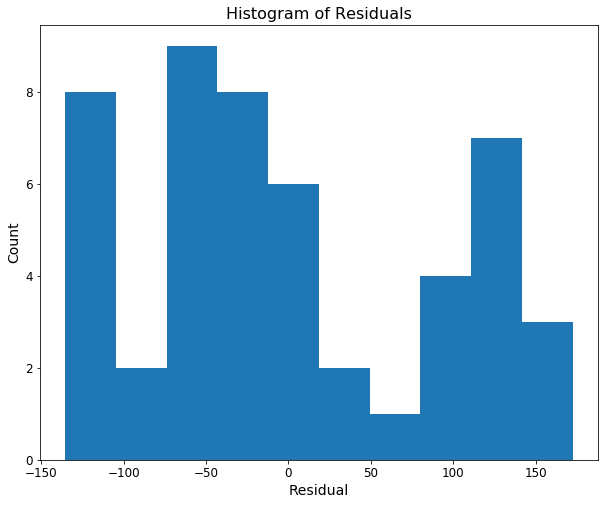

In [238]:
plt.figure(figsize=(10,8))
plt.hist(model2.resid)
plt.title('Histogram of Residuals', fontsize = 16)
plt.xlabel('Residual', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [ ]:
ax = plt.figure(figsize=(10,8)).add_subplot(111)
df2.plot(kind = 'Scatter', y = 'SAT_Score', x = 'GDP_Per_Capita', ax = ax)
ax.plot(df2['GDP_Per_Capita'], model2.fittedvalues, '-', color = 'black')